In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture as GM
from scipy import stats
from scipy.stats import norm
import seaborn as sns

In [13]:
with open('PCRsforR.csv') as f:
    lines = f.readlines()

split_lines = [line.strip().split(',') for line in lines]
split_lines = split_lines[2:]
#print(len(split_lines))
bp1 = np.array([int(round(float(x[0]))) for x in split_lines])

#Truncate outliers over 500
bp1 = bp1[bp1 <= 500]

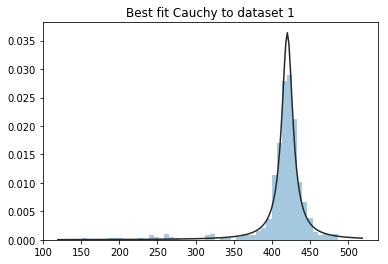

In [104]:
sns.distplot(bp1, kde=False, fit=stats.cauchy).set_title('Best fit Cauchy to dataset 1')
plt.show()

In [23]:
with open('SMYUI4 no selection distr.csv') as f:
    lines = f.readlines()
bp2 = np.array([int(x.strip()) for x in lines[1:]])
bp2 = bp2[bp2 <= 500]

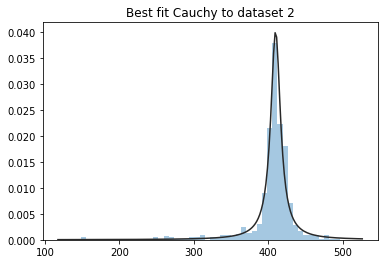

In [105]:
sns.distplot(bp2, kde=False, fit=stats.cauchy).set_title('Best fit Cauchy to dataset 2')
plt.show()

In [106]:
# Class to represent a Gaussian mixture model with two Gaussians:
# one best fit to data under 300, the other to the data over 300
class double_cauchy:
    def fit(data):
        data1 = data[data < 300]
        data2 = data[data >= 300]
        mu1, std1 = stats.cauchy.fit(data1)
        mu2, std2 = stats.cauchy.fit(data2)
        weight1, weight2 = len(data1)/len(data), len(data2)/len(data)
        return mu1, std1, mu2, std2, weight1, weight2
    
    def pdf(data, mu1, std1, mu2, std2, weight1, weight2):
        #print(mu1, std1, mu2, std2, weight1, weight2)
        return weight1 * stats.cauchy.pdf(data, mu1, std1) + weight2 * stats.cauchy.pdf(data, mu2, std2)

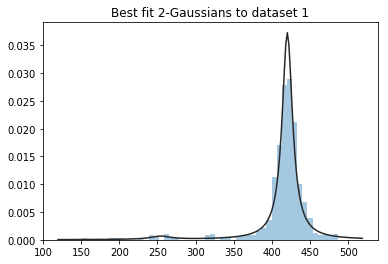

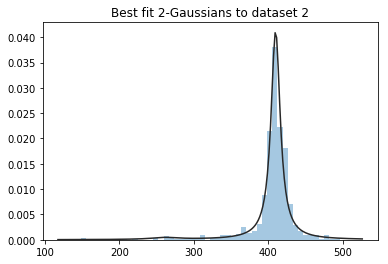

In [107]:
sns.distplot(bp1, kde=False, fit=double_cauchy).set_title('Best fit 2-Gaussians to dataset 1')
plt.show()

sns.distplot(bp2, kde=False, fit=double_cauchy).set_title('Best fit 2-Gaussians to dataset 2')
plt.show()

In [109]:
params1_double = double_cauchy.fit(bp1)
log_prob1_double = np.sum(np.log(double_cauchy.pdf(bp1, *params1_double)))
print('Log probability of first dataset under double Cauchy model: {}'.format(log_prob1_double))

params1_single = stats.cauchy.fit(bp1)
log_prob1_single = np.sum(np.log(stats.cauchy.pdf(bp1, *params1_single)))
print('Log probability of first dataset under single Cauchy model: {}\n'.format(log_prob1_single))

test_statistic1 = 2*(log_prob1_double - log_prob1_single)
print(test_statistic1)

p_value1 = stats.chi2.pdf(test_statistic1,2)
print(p_value1)

Log probability of first dataset under double Cauchy model: -2585.1604286063284
Log probability of first dataset under single Cauchy model: -2591.1447212258067

11.96858523895662
0.0012589971343702853


In [110]:
params2_double = double_cauchy.fit(bp2)
log_prob2_double = np.sum(np.log(double_cauchy.pdf(bp2, *params2_double)))
print('Log probability of second dataset under double Cauchy model: {}'.format(log_prob2_double))

params2_single = stats.cauchy.fit(bp2)
log_prob2_single = np.sum(np.log(stats.cauchy.pdf(bp2, *params2_single)))
print('Log probability of second dataset under single Cauchy model: {}\n'.format(log_prob2_single))

test_statistic2 = 2*(log_prob2_double - log_prob2_single)
print(test_statistic2)

p_value2 = stats.chi2.pdf(test_statistic2,2)
print(p_value2)

Log probability of second dataset under double Cauchy model: -2867.1434600541816
Log probability of second dataset under single Cauchy model: -2869.3565410505134

4.426161992663765
0.05468159067716223
